In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
percentages = np.load('percentages.npy')
sffs_accs = np.load('sffs_accs.npy')

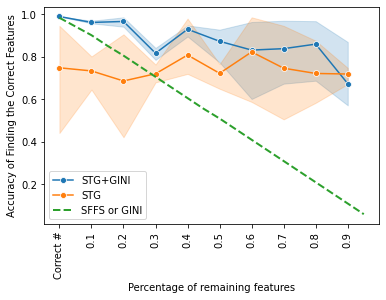

In [7]:
gini_stg_accs = pd.read_csv('gini_stg_accs.csv')
stg_accs = pd.read_csv('stg_accs.csv')
fig, ax = plt.subplots() 
plt.xlabel('Percentage of remaining features')
plt.ylabel('Accuracy of Finding the Correct Features')
sns.lineplot(data=pd.DataFrame(gini_stg_accs), x='percentage', y='acc',
   label="STG+GINI", marker='o')
sns.lineplot(data=pd.DataFrame(stg_accs), x='percentage', y='acc', 
    label="STG", marker='o')
ax.plot(percentages, sffs_accs, '--', linewidth=2, label='SFFS or GINI')
labels = [f'{tick:.1f}' for tick in np.arange(0, 1, 0.1)]
labels[0] = "Correct #"
plt.xticks(ticks=np.arange(0, 1, 0.1), labels=labels, rotation=90)
plt.legend()
plt.show()

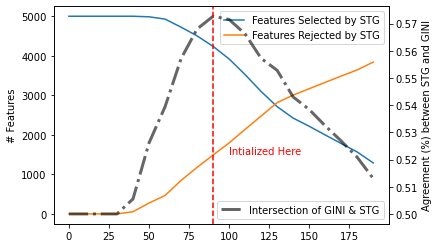

In [42]:
intersection_gini_stg = pd.read_csv('intersection.csv')
fig = plt.figure()

axes1 = fig.add_subplot(111)
axes1.plot(intersection_gini_stg['round'], intersection_gini_stg['selected intersection'],
    label='Features Selected by STG')
axes1.plot(intersection_gini_stg['round'], intersection_gini_stg['rejected intersection'],
    label='Features Rejected by STG')
axes1.set_ylabel("# Features")
axes1.legend()
axes2 = axes1.twinx()   # mirror them
axes2.plot(intersection_gini_stg['round'], intersection_gini_stg['acc'], alpha=0.6, 
    linewidth=3, linestyle='-.', label='Intersection of GINI & STG', color='k')

axes2.set_ylabel("Agreement (%) between STG and GINI")
axes2.legend()
max_idx = intersection_gini_stg['acc'].argmax()

plt.axvline(x=intersection_gini_stg['round'][max_idx], linestyle='--', color='r')
axes1.text(100, 1500, 'Intialized Here', color='r')
plt.xlabel("# Rounds training STG")
plt.show()